In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset : https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors/data

- customer_id: Unique ID of the customer.
- age: The age of the customer.
- annual_income: The customer's annual income (in USD).
- purchase_amount: The total amount of purchases made by the customer (in USD).
- purchase_frequency: Frequency of customer purchases (number of times per year).
- region: The region where the customer lives (North, South, East, West).
- loyalty_score: Customer's loyalty score (a value between 0-100).

This dataset includes information on customer profiles and their purchasing behaviors. The data features columns for user ID, age, annual income, purchase amount, loyalty score (categorized into classes), region, and purchase frequency.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Portofolio/Customer Purchasing Behaviors/Customer Purchasing Behaviors.csv')

In [ ]:
data

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


**Cleaning Data**

In [ ]:
data.isna().sum()

,0
user_id,0
age,0
annual_income,0
purchase_amount,0
loyalty_score,0
region,0
purchase_frequency,0


Our customer data **is clean**, without missing values.

**Exploratory Data Analysis - EDA**

In [ ]:
data_region = data.region.value_counts().reset_index()

<Axes: xlabel='region', ylabel='count'>

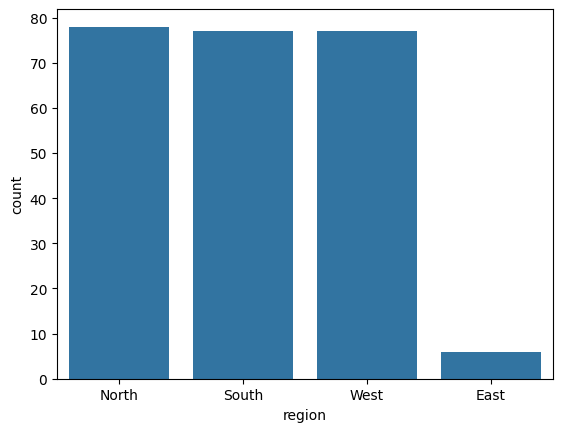

In [ ]:
sns.barplot(data=data_region, x = 'region', y ='count')

Terdapat 238 penduduk dengan persebaran :
- North Region : 78 Penduduk
- South Region : 77 Penduduk
- West Region : 77 Penduduk
- East Region : 6 Penduduk

1. Kita akan melakukan pengecekan apakah purchase_amount ada relasi dengan purchase_frequency

<Axes: title={'center': 'Does purchase frequency represent purchase amount ?'}, xlabel='purchase_amount', ylabel='purchase_frequency'>

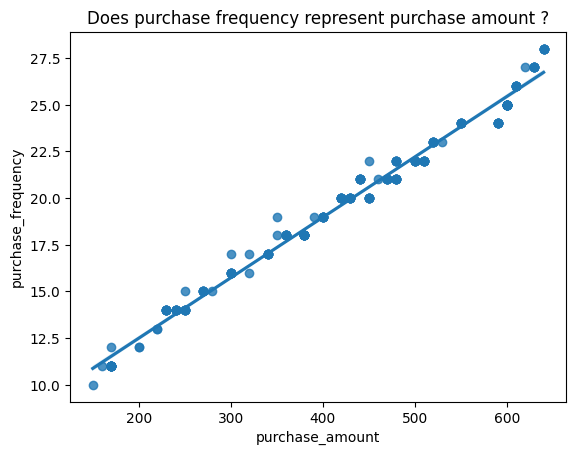

In [ ]:
plt.title("Does purchase frequency represent purchase amount ?")
sns.regplot(data = data, x = 'purchase_amount', y = 'purchase_frequency')

In [ ]:
data['purchase_amount'].corr(data['purchase_frequency'])

0.9935785441834435

Berdasarkan visualisasi berikut, dapat kita lihat korelasi antara frekuensi pembelian dengan harga pembelian sanat positif. Sehingga dapat kita asumsikan bahwa kedua tabel tersebut saling mewakilkan.

Sehingga untuk kedepannya kita akan hanya menggunakan salah satu dari kolom tersebut

2. Membeli barang membutuhkan uang, apakah pendapatan tahunan seseorang akan mempengaruhi kualitas pembeliannya?

<Axes: title={'center': 'What is the correlation between annual income and purchase frequency?'}, xlabel='annual_income', ylabel='purchase_frequency'>

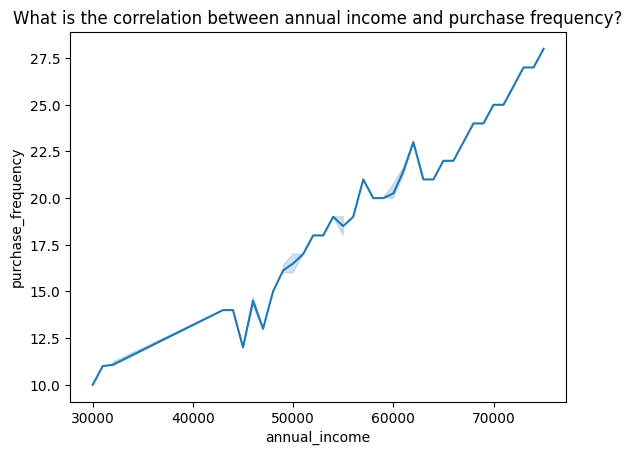

In [ ]:
plt.title("What is the correlation between annual income and purchase frequency?")
sns.lineplot(data = data, x = 'annual_income', y = 'purchase_frequency')

In [ ]:
data['annual_income'].corr(data['purchase_frequency'])

0.9829204016501978

Dati hasil visualisasi tersebut, dapat kita lihat bahwa semakin tingggi pendapatan seseorang, maka frekuensi seseorang dalam melakukan pembelian akan terus meningkat.

Dengan ini kita bisa berasumsi jika semakin besar pendapatan seseorang, maka kebutuhan yang mereka butuhkan akan semakin banyak.

3. Jika demikian, apakah pendapatan tahunan itu dipengaruhi oleh usia seseorang?

<Axes: title={'center': 'Age vs Annual Income'}, xlabel='age', ylabel='annual_income'>

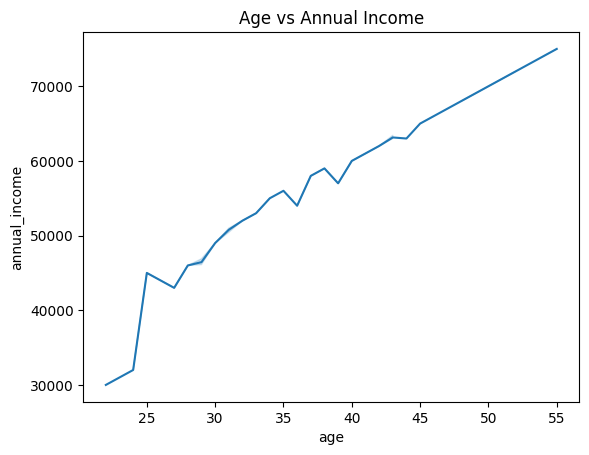

In [ ]:
plt.title("Age vs Annual Income")
sns.lineplot(data = data, x = 'age', y = 'annual_income')

In [ ]:
data['annual_income'].corr(data['age'])

0.9748329462400551

Berdasarkan data yang dikumpulkan, ternyata usia seseorang sangat berhubungan dengan pendapatan yang akan didapat.

4. Apabila pendapatan tahunan dipengaruhi oleh usia, maka dapat kita asumsikan semakin bertambah umur seseorang, maka ia akan semakin sering melakukan pembelian ?

<Axes: xlabel='age', ylabel='purchase_frequency'>

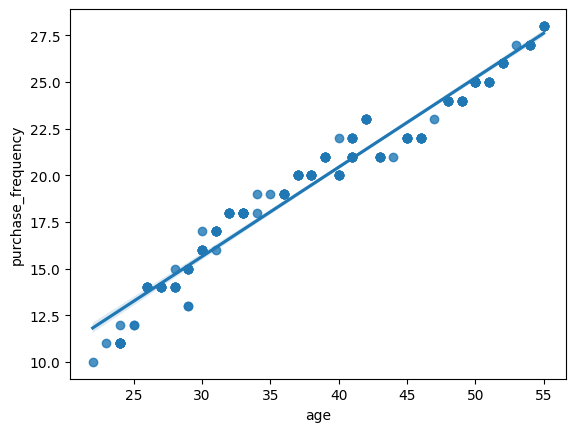

In [ ]:
sns.regplot(data = data, x = 'age', y = 'purchase_frequency')

In [ ]:
data['purchase_frequency'].corr(data['age'])

0.9805324896239003

Dengan visualisasi tersebut, asumsi yang telah dibuat ternyata benar. Dengan korelasi sebesar 0.98, dapat dikatakan bahwa adanya penambahan frekuensi berbelanja seiring bertambahnya usia.

5. Dari keempat Region tersebut, apakah North Region mempunyai frekuensi pembellian terbanyak dan East Region sebagai yang paling sedikit?

In [ ]:
pf_per_region = data.groupby('region')['purchase_frequency'].sum().reset_index()

In [ ]:
pf_per_region

,region,purchase_frequency
0,East,100
1,North,1377
2,South,1499
3,West,1736


<Axes: xlabel='region', ylabel='purchase_frequency'>

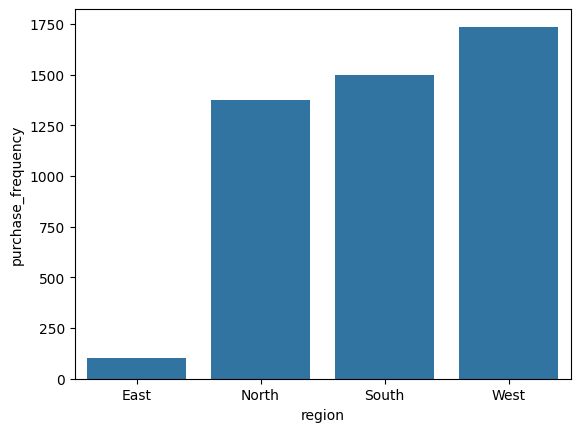

In [ ]:
sns.barplot(data = pf_per_region, x = 'region', y = 'purchase_frequency')

Yep, East Region menjadi region dengan frekuensi pembelian terendah dikarenakan jumlah penduduk yang sangat rendah

Namun secara mengejutkan North Region menempati urutan ketiga.


6. Apa penyebab North Region dapat dibawah South Region dan West Region ? Lalu kenapa West Region lebih tinggi dari South Region ?

In [ ]:
data.groupby('region')['age'].describe().reset_index()

,region,count,mean,std,min,25%,50%,75%,max
0,East,6.0,31.666667,7.554248,22.0,26.25,32.0,37.75,40.0
1,North,78.0,34.358974,8.091962,23.0,28.00,31.0,38.00,50.0
2,South,77.0,38.000000,8.950154,24.0,33.00,39.0,43.00,55.0
3,West,77.0,44.272727,8.202433,24.0,37.00,48.0,51.00,55.0


In [ ]:
data.groupby('region')['annual_income'].describe().reset_index()

,region,count,mean,std,min,25%,50%,75%,max
0,East,6.0,49000.000000,12033.287165,30000.0,43250.0,51000.0,58750.0,60000.0
1,North,78.0,53038.461538,9323.120691,31000.0,46000.0,51000.0,59000.0,70000.0
2,South,77.0,55766.233766,12562.366631,32000.0,53000.0,57000.0,63000.0,75000.0
3,West,77.0,64129.870130,8743.946251,32000.0,58000.0,68000.0,71000.0,75000.0


Untuk menjawab pertanyaan tersebut, kita harus lihat dari statistik berikut.

Meski North Region memiliki populasi yang lebih banyak, hal ini tidak selalu berbanding lurus dengan frekuensi pembelian. Faktor-faktor seperti usia dan pendapatan tahunan mungkin berkontribusi pada rendahnya frekuensi pembelian di region ini. Oleh karena itu, populasi yang besar tidak menjamin peningkatan dalam frekuensi pembelian.

Lalu untuk West Region dan South Region memiliki populasi, rentang usia, dan rentang pendapatan tahunan yang relatif sama. Namun, perbedaan signifikan muncul dari rata-rata nilai yang lebih tinggi di West Region dibandingkan dengan South Region. Kondisi ini berkontribusi pada kemampuan West Region untuk mencapai frekuensi pembelian yang lebih tinggi. Dengan kata lain, meskipun kedua region ini memiliki karakteristik demografis yang serupa, tingkat rata-rata yang lebih baik di West Region memberikan dorongan bagi konsumen untuk melakukan pembelian dengan lebih sering.